In [63]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [64]:
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text,target
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0
5,not the whole crew,0


In [65]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 2 columns):
text      2388 non-null object
target    2388 non-null int64
dtypes: int64(1), object(1)
memory usage: 37.4+ KB


# Train / Dev / Test Split

Before we can train any model, we first consider how to split the data. Here I chose to split the data into three chunks: train, development, test. I referenced Andrew Ng's "deeplearning.ai" course on how to split the data.

Train set: The sample of data used for learning.

Test set: The sample of data used only to assess the performance of a final model.

In [67]:
from sklearn.model_selection import train_test_split

# Feature Extraction

If we want to use text in machine learning algorithms, we’ll have to convert them to a numerical representation. One of the methods is called bag-of-words approach. The bag of words model ignores grammar and order of words. Once we have a corpus (text data) then first, a list of vocabulary is created based on the entire corpus. Then each document or data entry is represented as numerical vectors based on the vocabulary built from the corpus.

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(my_df.text)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, my_df.target, test_size=0.3, random_state=1)

# Model Building and Evaluation
Let's build the Text Classification Model using TF-IDF.

TFIDF is another way to convert textual data to numeric form, and is short for Term Frequency-Inverse Document Frequency. The vector value it yields is the product of these two terms; TF and IDF.

Let’s first look at Term Frequency. We have already looked at term frequency with count vectorizer, but this time, we need one more step to calculate the relative frequency. Let’s say we have two documents in our corpus as below.

1)I love dogs
2)I hate dogs and knitting

Relative term frequency is calculated for each term within each document as below.

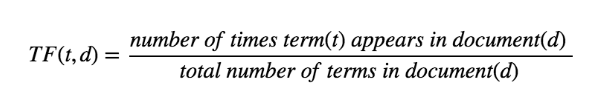

For example, if we calculate relative term frequency for ‘I’ in both document 1 and document 2, it will be as below.

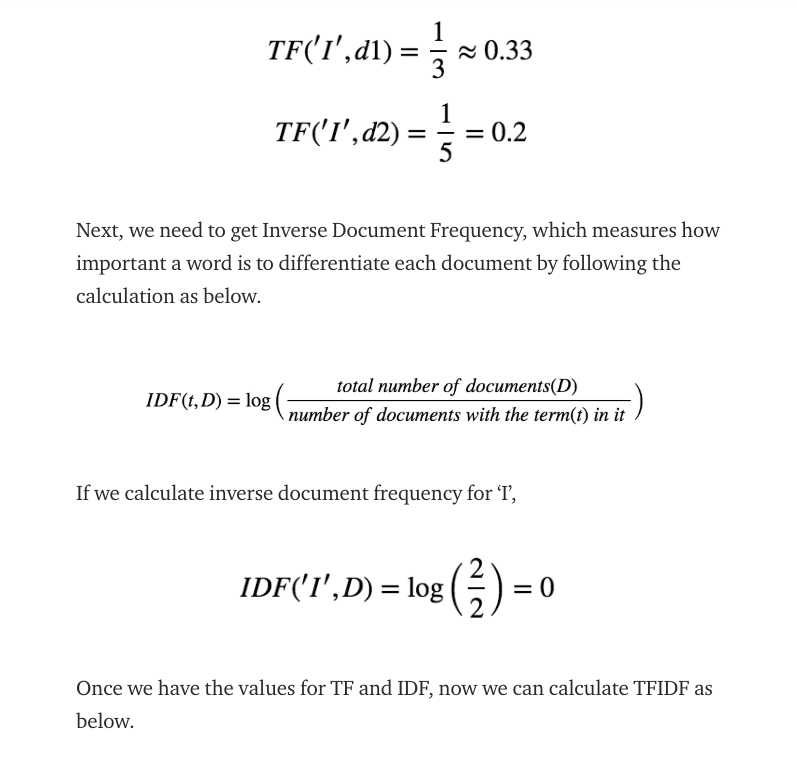

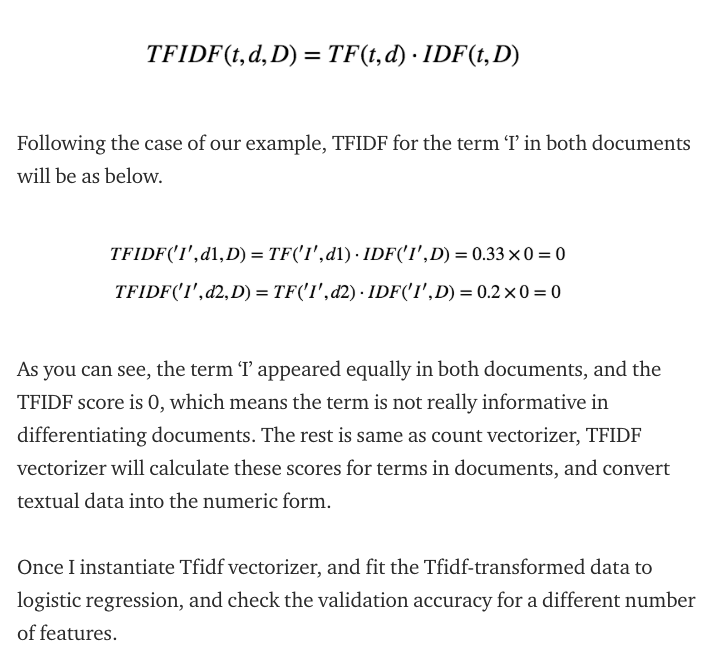

First, import the MultinomialNB module and create a Multinomial Naive Bayes classifier object using MultinomialNB() function.

Then, fit your model on a train set using fit() and perform prediction on the test set using predict().

In [74]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.7210599721059973


Well, you got a classification rate of 72.10% using CountVector(or BoW), which is not too good but not ba too. We will try to improve this.

# Model Building and Evaluation (TF-IDF)
Let's build the Text Classification Model using TF-IDF.

First, import the MultinomialNB module and create the Multinomial Naive Bayes classifier object using MultinomialNB() function.

Then, fit your model on a train set using fit() and perform prediction on the test set using predict().

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(my_df.text)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, my_df.target, test_size=0.3, random_state=123)

In [81]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6778242677824268


Well, you got a classification rate of 67.78% using TF-IDF features, which is not considered as good accuracy. It can be further increased by using some other preprocessing or feature engineering.